# Title: Gold Price Prediction
By: Vishal Kadu


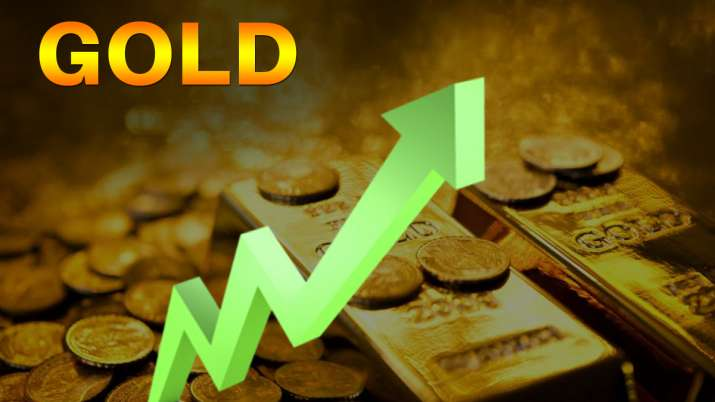

### Aim: To Predict The Price Of Gold 



We have input data as .csv(comma seprated value) file containing total 2290 rows and 7 columns.

Following are the steps we are going to follow in order to create our Gold price prediction model.

1.   Import the relevant packages.
2.   Explore the dataset.
3.   Prepare the dataset for training.
4.   Use any prediction algorithm based upon the EDA(Exploratory Data Analysis).
5.   Train the model to fit the data.
6.   Make predictions using the trained model.
7.   Create a test case and generate a predicted result from the system.







Let's Start,

1.  Import the relevant packages.

In [4]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

2.  Explore the dataset.

In [5]:
dataset = pd.read_csv("/content/drive/MyDrive/gldpricedata.csv") 

dataset.head() #Return first 5 Rows

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
dataset.shape #Returns tuple of shape (Rows, columns) of Given Dataset.

(2290, 6)

we observed that, dataset contains 2290 rows and 6 columns.

In [7]:
dataset.dtypes #Returns Data Type of each Column

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

we obseved that, Date column is of data type object(date) rest column are of float64(numerical) data type.

In [8]:
dataset.isna().sum() #Returns total null values in each Column

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

we observed that, there are no Null values in given dataset.

In [9]:
dataset.describe() #Returns Stastical data of each Column

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


We will use **'Correlation'** to find out measure of extent of interdependance between variables.
In python pearson's correlation method is default function of corr().

Pearson's Correlation: It measures the linear dependance between two variables (X and y variables).

Range of resulting coefficient is between -1 to +1.
where,
1.  1 means Perfect positive linear correlation.
2.  0 means No linear correlation as no effect of variables on each other.
3. -1 means Perfect Negative correlation.



In [10]:
correlation = dataset.corr()

correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


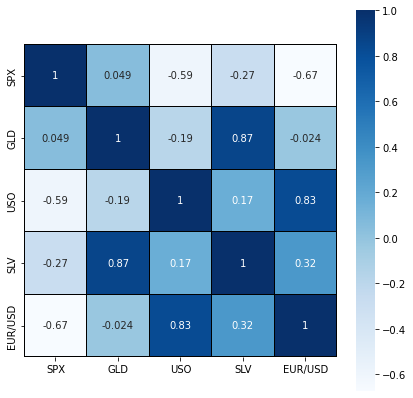

In [11]:
#heatmap to shows a 2D correlation matrix between two variables.
plt.figure(figsize = (7,7))

sns.heatmap(correlation, square='True', cbar=True, annot=True, linewidths='0.2', linecolor='black', cmap='Blues')

Correaltion between Gold (Target variable) and other variables.

In [12]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

Distplot: It is important in visualization case having more than one independant variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


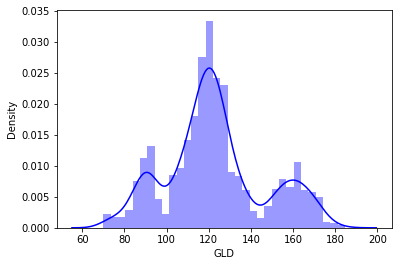

In [13]:
sns.distplot(dataset['GLD'],color='b')

Step 3. Prepare the dataset for training.

Data Spliting into X = independent(Features) varibales and y = dependent variables(Label)

In [14]:
X = dataset.drop(['Date','GLD'],axis=1)
y = dataset['GLD']

In [15]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [16]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2) #Training data 80% rest for testing purpose

Step 4. Use any prediction algorithm based upon the EDA

we will use Random Forest Algorithm for Regression.

In [18]:
rfr = RandomForestRegressor()

Step 5. Train the model to fit the data

In [19]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Step 6. Make predictions using the trained model

In [20]:
y_pred = rfr.predict(x_test)

y_pred

array([168.77809971,  81.57300009, 116.24980001, 127.55740078,
       120.85180132, 154.73249693, 150.78369868, 126.11530057,
       117.50349871, 126.01990082, 116.54130128, 172.00040053,
       142.43289904, 167.81289877, 115.31760004, 117.52140064,
       137.38290375, 169.90280009, 159.31800314, 157.31619906,
       155.00440027, 125.1813003 , 175.85519952, 157.30950319,
       125.1855006 ,  93.83659954,  77.81190025, 120.47260034,
       119.11159948, 167.40679964,  88.12500076, 125.27569972,
        91.30210129, 117.7081999 , 121.16369947, 136.43220066,
       115.50430117, 115.23090051, 148.34340027, 107.41960084,
       104.50690284,  87.1177977 , 126.57230062, 117.94410005,
       152.96799897, 119.62350012, 108.45909995, 108.20659869,
        93.10720034, 127.09299771,  74.35260077, 113.73549927,
       121.26059998, 111.36089905, 118.94089903, 120.62409956,
       158.4617005 , 166.93820069, 146.96389677,  85.83209843,
        94.5949004 ,  86.85039895,  90.54260035, 119.03

R-Squared or R^2:
1. it is also called as coefficient of Determination.
2. it determines how close the data is to be fitted line.
3. it is the percentage of variation of target variable(y), that is explained by linear model. 

In [29]:
from sklearn import metrics

metrics.r2_score(y_test,y_pred)

0.9887746491699477

hence it is clear that error is less and model is working good.

In [30]:
accuracy = rfr.score(x_train,y_train)

print(f"we have Training data with {(accuracy * 100).round(2)}% accuracy.")

we have Training data with 99.85% accuracy.


In [31]:
accuracy = rfr.score(x_test,y_test)

print(f"we have Testing data with {(accuracy * 100).round(2)}% accuracy.")

we have Testing data with 98.88% accuracy.


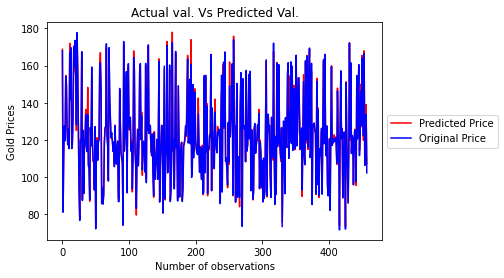

In [52]:
#Visualising the Accuracy.

plt.plot(y_pred,color="Red",label="Predicted Price")

plt.plot(y_test1,color="Blue",label="Original Price")

plt.title("Actual val. Vs Predicted Val.")

plt.xlabel('Number of observations')

plt.ylabel('Gold Prices')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


Step 7. Create a test case and generate a predicted result from the system

In [66]:
a=float(input("Enter Value Of SPX    : "))
b=float(input("Enter Value Of USO    : "))
c=float(input("Enter Value Of SLV    : "))
d=float(input("Enter Value Of EUR/USD: "))


print('Predicted value is', rfr.predict([[a,b,c,d]]))

Enter Value Of SPX    : 2895.4567
Enter Value Of USO    : 14.5673
Enter Value Of SLV    : 17.3456
Enter Value Of EUR/USD: 1.9067
Predicted value is [127.54100111]


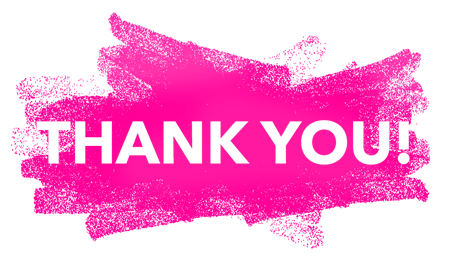